In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv("spam.csv", encoding="ISO-8859-1")

In [10]:
print(df.shape)
df.head()

(5572, 2)


,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


<h1 align= 'center'>Cleaning Data<h1>

* Drop unused columns

In [4]:
df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
df.rename({"v1": "target", "v2": "text"}, axis=1, inplace=True)

* Check N/A values

In [7]:
df.isnull().sum()

target    0
text      0
dtype: int64

* Check duplicated values

In [8]:
df.duplicated().sum()

403

In [9]:
df[df.duplicated()]

,target,text
102,ham,As per your request 'Melle Melle (Oru Minnamin...
153,ham,As per your request 'Melle Melle (Oru Minnamin...
206,ham,"As I entered my cabin my PA said, '' Happy B'd..."
222,ham,"Sorry, I'll call later"
325,ham,No calls..messages..missed calls
...,...,...
5524,spam,You are awarded a SiPix Digital Camera! call 0...
5535,ham,"I know you are thinkin malaria. But relax, chi..."
5539,ham,Just sleeping..and surfing
5553,ham,Hahaha..use your brain dear


In [11]:
df.drop_duplicates(keep='first', inplace=True)
print(df.shape)
df.duplicated().sum()

(5169, 2)


0

* Label values in target column

In [12]:
df['target'] = df['target'].map({'ham': 0, 'spam': 1})
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

<h1 align ='center'>Explore Data Analysis<h1>

* Explore distribution of values in feature and target

In [13]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


<Axes: xlabel='target', ylabel='count'>

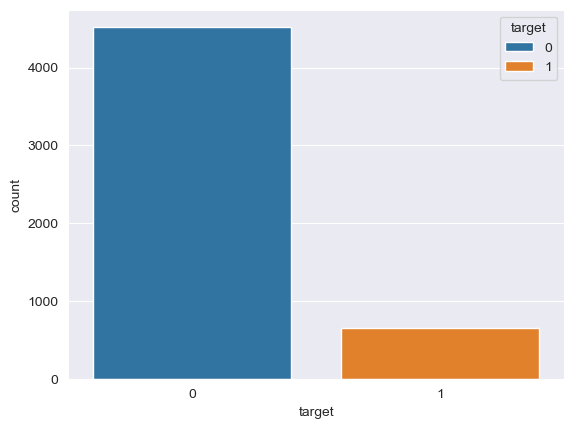

In [15]:
sns.countplot(x='target', data=df, hue='target')

* Create :
* 1/ Total number of characters from text
* 2/ Total sentences of text

In [16]:
#Create total number of character
df['total_char'] = df['text'].apply(lambda x: len(x))
df.head()

,target,text,total_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [24]:
from nltk.tokenize import word_tokenize, sent_tokenize


def count_words(text):
    words = word_tokenize(text)
    return len(words)

In [19]:
# Create number of words in text
df['num_words'] = df['text'].apply(count_words)
df.head()

,target,text,total_char,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [25]:
#Create sentences from text
def count_sentences(text):
    sentences = sent_tokenize(text)
    return len(sentences)

In [26]:
df['num_sentences'] = df['text'].apply(count_sentences)
df.head()

,target,text,total_char,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


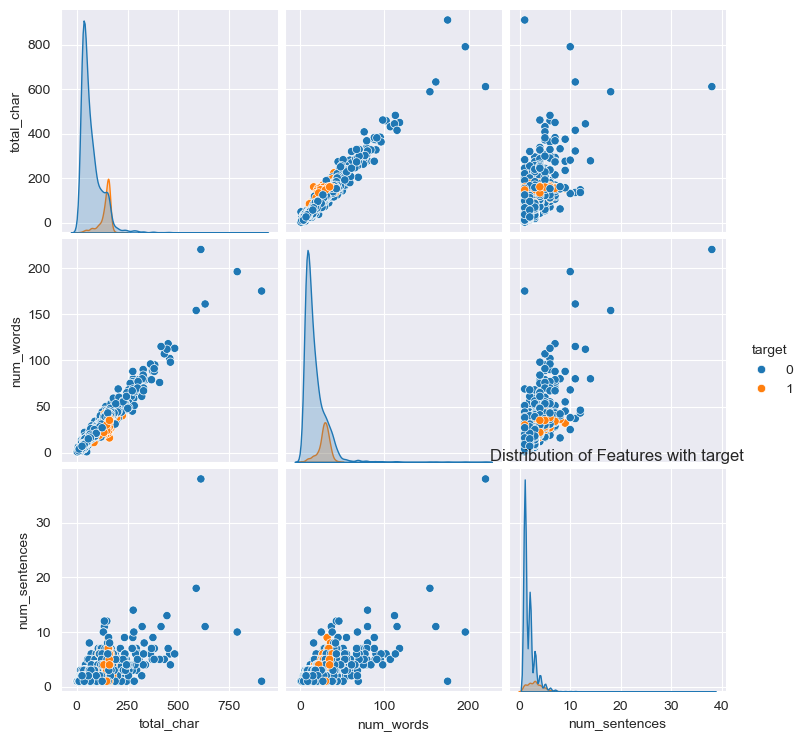

In [28]:
# Explore distribution
sns.pairplot(df, hue='target')
plt.title('Distribution of Features with target')
plt.show()

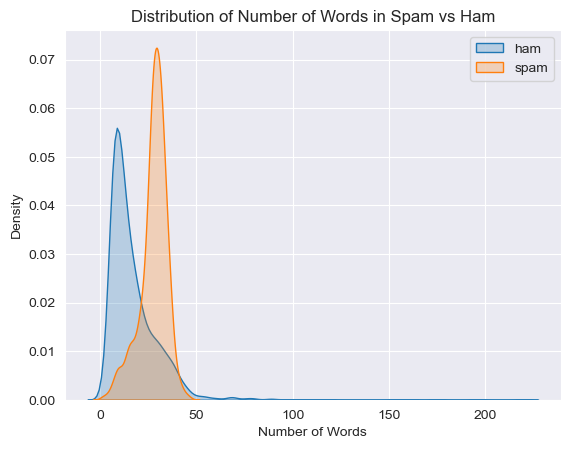

In [31]:
sns.kdeplot(df[df['target'] == 0]['num_words'], fill=True, label='ham')
sns.kdeplot(df[df['target'] == 1]['num_words'], fill=True, label='spam')
plt.title('Distribution of Number of Words in Spam vs Ham')
plt.xlabel('Number of Words')
plt.ylabel('Density')
plt.legend()
plt.show()

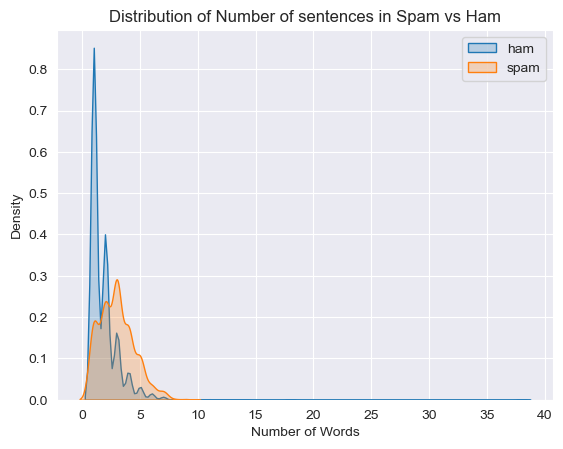

In [33]:
sns.kdeplot(df[df['target'] == 0]['num_sentences'], fill=True, label='ham')
sns.kdeplot(df[df['target'] == 1]['num_sentences'], fill=True, label='spam')
plt.title('Distribution of Number of sentences in Spam vs Ham')
plt.xlabel('Number of Words')
plt.ylabel('Density')
plt.legend()
plt.show()

<h1 align = 'center'>Text Precessing<h1>

* Steps :
* 1/ Lowercase
* 2/ Tokenize
* 3/ Special character ( punctuation vv.. )
* 4/ Stop words
* 5/ Stemming

In [48]:
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string


def text_processing(text):
    new_text = text.lower()  # Lowercase
    token = word_tokenize(new_text)  # Tokenize all words
    filter_words = [word for word in token if
                    word.isalnum() and word not in string.punctuation and word not in stopwords.words("english")]
    stemmer = PorterStemmer()
    word_stemming = [stemmer.stem(word) for word in filter_words]
    return " ".join(word_stemming)

In [49]:
sentences = "Hi, I am <NAME> and I am a student at UofA. I'm waiting for your reply. Thanks!"
text_processing(sentences)

'hi name student uofa wait repli thank'

In [50]:
# Create column transformed text
df['transformed_text'] = df['text'].apply(text_processing)
df.head()

,target,text,total_char,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [51]:
df['num_transformed_text'] = df['transformed_text'].apply(lambda x: len(x.split()))
df.head()

,target,text,total_char,num_words,num_sentences,transformed_text,num_transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...,16
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...,24
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say,9
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though,7


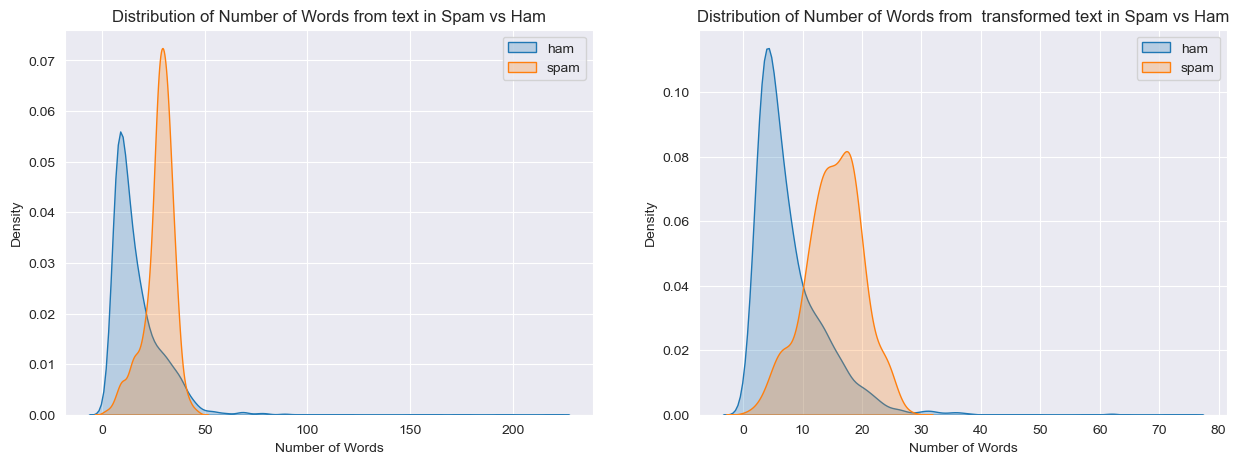

In [55]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
axes = axes.flatten()
sns.kdeplot(df[df['target'] == 0]['num_words'], ax=axes[0], label='ham', fill=True)
sns.kdeplot(df[df['target'] == 1]['num_words'], ax=axes[0], label='spam', fill=True)

sns.kdeplot(df[df['target'] == 0]['num_transformed_text'], ax=axes[1], label='ham', fill=True)
sns.kdeplot(df[df['target'] == 1]['num_transformed_text'], ax=axes[1], label='spam', fill=True)
axes[0].set_title('Distribution of Number of Words from text in Spam vs Ham')
axes[0].set_xlabel('Number of Words')
axes[0].set_ylabel('Density')
axes[0].legend()
axes[1].set_title('Distribution of Number of Words from  transformed text in Spam vs Ham')
axes[1].set_xlabel('Number of Words')
axes[1].set_ylabel('Density')
axes[1].legend()

* visualize ham and spam

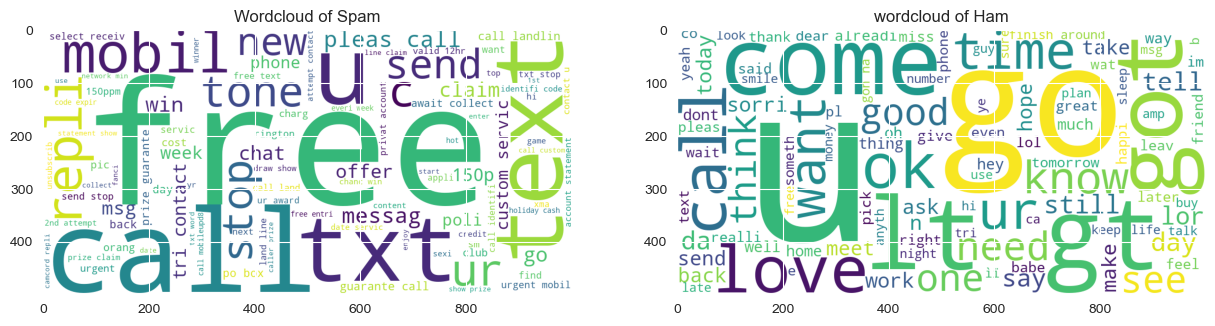

In [58]:
from wordcloud import WordCloud

wc = WordCloud(background_color='white', width=1000, height=500, min_font_size=10, max_words=100)
fig1, axes = plt.subplots(1, 2, figsize=(15, 5))
axes = axes.flatten()
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=' '))
axes[0].imshow(spam_wc)
axes[0].set_title('Wordcloud of Spam')
axes[1].imshow(wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=' ')))
axes[1].set_title('wordcloud of Ham')
plt.show()

<h1 align ='center'>Training Model<h1>

In [86]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

cv = CountVectorizer()

* Train using CountVectorizer

In [78]:
X = cv.fit_transform(df['transformed_text']).toarray()
y = df['target']

In [71]:
X.shape, y.value_counts()

((5169, 6708),
 target
 0    4516
 1     653
 Name: count, dtype: int64)

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [73]:
model_nb = MultinomialNB()
model_gnb = GaussianNB()
model_bnb = BernoulliNB()

In [74]:
# Train with Multinomial
model_nb.fit(X_train,y_train)
y_pred_nb = model_nb.predict(X_test)
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1107
           1       0.90      0.91      0.91       186

    accuracy                           0.97      1293
   macro avg       0.94      0.95      0.95      1293
weighted avg       0.97      0.97      0.97      1293



In [75]:
# Train with GaussianNB
model_gnb.fit(X_train,y_train)
y_pred_gnb = model_gnb.predict(X_test)
print(classification_report(y_pred_gnb, y_test))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92       993
           1       0.87      0.54      0.66       300

    accuracy                           0.87      1293
   macro avg       0.87      0.76      0.79      1293
weighted avg       0.87      0.87      0.86      1293



In [76]:
# train wit bernoulli
model_bnb.fit(X_train, y_train)
y_pred_bnb = model_bnb.predict(X_test)
print(classification_report(y_pred_bnb, y_test))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1144
           1       0.78      0.97      0.87       149

    accuracy                           0.97      1293
   macro avg       0.89      0.97      0.92      1293
weighted avg       0.97      0.97      0.97      1293



In [77]:
from xgboost import XGBClassifier

model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)
y_pred_xgb = model_xgb.predict(X_test)
print(classification_report(y_pred_xgb, y_test))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1125
           1       0.85      0.95      0.90       168

    accuracy                           0.97      1293
   macro avg       0.92      0.96      0.94      1293
weighted avg       0.97      0.97      0.97      1293



* Train with Random Search CV

* Train with Randomized Search CV for MultinomialNB

In [79]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Parameter grids for each model
param_grid_multinomial = {'alpha': np.linspace(0.1, 1.0, 10)}
param_grid_bernoulli = {'alpha': np.linspace(0.1, 1.0, 10)}
param_grid_xgb = {
    'n_estimators': randint(50, 200),
    'max_depth': randint(3, 10),
    'learning_rate': np.linspace(0.01, 0.3, 10),
    'subsample': np.linspace(0.5, 1.0, 10)
}

# RandomizedSearchCV for MultinomialNB
random_search_multinomial = RandomizedSearchCV(estimator=MultinomialNB(), param_distributions=param_grid_multinomial, n_iter=10, cv=5, random_state=42, verbose=2, n_jobs=-1)
random_search_multinomial.fit(X_train, y_train)
print("Best Parameters for MultinomialNB:", random_search_multinomial.best_params_)
y_pred_multinomial = random_search_multinomial.best_estimator_.predict(X_test)
print("Classification Report for MultinomialNB:\n", classification_report(y_test, y_pred_multinomial))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters for MultinomialNB: {'alpha': 0.7000000000000001}
Classification Report for MultinomialNB:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98      1107
           1       0.89      0.91      0.90       186

    accuracy                           0.97      1293
   macro avg       0.94      0.95      0.94      1293
weighted avg       0.97      0.97      0.97      1293



* Train with Randomized Search CV for Bernoulli

In [80]:
# RandomizedSearchCV for BernoulliNB
random_search_bernoulli = RandomizedSearchCV(estimator=BernoulliNB(), param_distributions=param_grid_bernoulli, n_iter=10, cv=5, random_state=42, verbose=2, n_jobs=-1)
random_search_bernoulli.fit(X_train, y_train)
print("Best Parameters for BernoulliNB:", random_search_bernoulli.best_params_)
y_pred_bernoulli = random_search_bernoulli.best_estimator_.predict(X_test)
print("Classification Report for BernoulliNB:\n", classification_report(y_test, y_pred_bernoulli))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters for BernoulliNB: {'alpha': 0.2}
Classification Report for BernoulliNB:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1107
           1       0.95      0.91      0.93       186

    accuracy                           0.98      1293
   macro avg       0.97      0.95      0.96      1293
weighted avg       0.98      0.98      0.98      1293



* Train with Randomized Search CV for Xgboost

In [82]:
# RandomizedSearchCV for XGBoost
random_search_xgb = RandomizedSearchCV(estimator=XGBClassifier(eval_metric='logloss', random_state=42), param_distributions=param_grid_xgb, n_iter=10, cv=5, random_state=42, verbose=2, n_jobs=-1)
random_search_xgb.fit(X_train, y_train)
print("Best Parameters for XGBoost:", random_search_xgb.best_params_)
y_pred_xgb = random_search_xgb.best_estimator_.predict(X_test)
print("Classification Report for XGBoost:\n", classification_report(y_test, y_pred_xgb))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters for XGBoost: {'learning_rate': 0.20333333333333334, 'max_depth': 6, 'n_estimators': 142, 'subsample': 0.8888888888888888}
Classification Report for XGBoost:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      1107
           1       0.95      0.84      0.89       186

    accuracy                           0.97      1293
   macro avg       0.96      0.92      0.94      1293
weighted avg       0.97      0.97      0.97      1293



* training with optuna for MultinomialNB and Bernoulli

* Optuna for MultinomialNB

In [83]:
import optuna
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

def objective_multinomial(trial):
    alpha = trial.suggest_float('alpha', 0.1, 1.0)
    model = MultinomialNB(alpha=alpha)
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    return scores.mean()

study_multinomial = optuna.create_study(direction="maximize", study_name="MultinomialNB")
study_multinomial.optimize(objective_multinomial, n_trials=20)
best_params_multinomial = study_multinomial.best_params
best_model_multinomial = MultinomialNB(alpha=best_params_multinomial['alpha'])
best_model_multinomial.fit(X_train, y_train)
y_pred_multinomial = best_model_multinomial.predict(X_test)
print("MultinomialNB Best Parameters:", best_params_multinomial)
print("Accuracy:", accuracy_score(y_test, y_pred_multinomial))

[I 2024-12-22 16:07:03,690] A new study created in memory with name: MultinomialNB
[I 2024-12-22 16:07:06,436] Trial 0 finished with value: 0.9700724975058197 and parameters: {'alpha': 0.18500904291872422}. Best is trial 0 with value: 0.9700724975058197.
[I 2024-12-22 16:07:08,954] Trial 1 finished with value: 0.9700734951779182 and parameters: {'alpha': 0.268172375265451}. Best is trial 1 with value: 0.9700734951779182.
[I 2024-12-22 16:07:11,511] Trial 2 finished with value: 0.9716215497173261 and parameters: {'alpha': 0.3712032809194148}. Best is trial 2 with value: 0.9716215497173261.
[I 2024-12-22 16:07:14,354] Trial 3 finished with value: 0.9729105420685068 and parameters: {'alpha': 0.811276726853467}. Best is trial 3 with value: 0.9729105420685068.
[I 2024-12-22 16:07:17,114] Trial 4 finished with value: 0.9734266711007649 and parameters: {'alpha': 0.9539853635416443}. Best is trial 4 with value: 0.9734266711007649.
[I 2024-12-22 16:07:19,927] Trial 5 finished with value: 0.9736

[CV] END learning_rate=0.20333333333333334, max_depth=5, n_estimators=137, subsample=0.7222222222222222; total time=  23.6s
[CV] END learning_rate=0.20333333333333334, max_depth=5, n_estimators=137, subsample=0.7222222222222222; total time=  16.0s
[CV] END learning_rate=0.1388888888888889, max_depth=3, n_estimators=107, subsample=0.7777777777777778; total time=  15.3s
[CV] END learning_rate=0.07444444444444444, max_depth=6, n_estimators=104, subsample=0.6666666666666666; total time=  12.9s


[I 2024-12-22 16:07:49,042] Trial 15 finished with value: 0.9729105420685068 and parameters: {'alpha': 0.8406989705125805}. Best is trial 12 with value: 0.9736847356168938.
[I 2024-12-22 16:07:51,685] Trial 16 finished with value: 0.9736847356168938 and parameters: {'alpha': 0.9832661107824192}. Best is trial 12 with value: 0.9736847356168938.


[CV] END learning_rate=0.20333333333333334, max_depth=6, n_estimators=142, subsample=0.8888888888888888; total time=  24.3s
[CV] END learning_rate=0.10666666666666666, max_depth=5, n_estimators=199, subsample=0.7222222222222222; total time=  23.2s
[CV] END learning_rate=0.2677777777777778, max_depth=3, n_estimators=108, subsample=1.0; total time=  14.8s
[CV] END learning_rate=0.1388888888888889, max_depth=3, n_estimators=67, subsample=0.6666666666666666; total time=  10.1s
[CV] END learning_rate=0.20333333333333334, max_depth=6, n_estimators=142, subsample=0.8888888888888888; total time=  24.3s
[CV] END learning_rate=0.10666666666666666, max_depth=5, n_estimators=199, subsample=0.7222222222222222; total time=  23.3s
[CV] END learning_rate=0.2677777777777778, max_depth=3, n_estimators=108, subsample=1.0; total time=  14.9s
[CV] END learning_rate=0.1388888888888889, max_depth=3, n_estimators=67, subsample=0.6666666666666666; total time=  10.0s
[CV] END learning_rate=0.1388888888888889, m

[I 2024-12-22 16:07:54,511] Trial 17 finished with value: 0.9736847356168938 and parameters: {'alpha': 0.9755330644369018}. Best is trial 12 with value: 0.9736847356168938.


[CV] END learning_rate=0.20333333333333334, max_depth=6, n_estimators=142, subsample=0.8888888888888888; total time=  24.2s
[CV] END learning_rate=0.10666666666666666, max_depth=5, n_estimators=199, subsample=0.7222222222222222; total time=  22.0s
[CV] END learning_rate=0.2677777777777778, max_depth=3, n_estimators=108, subsample=1.0; total time=  14.5s
[CV] END learning_rate=0.2677777777777778, max_depth=5, n_estimators=100, subsample=0.8333333333333333; total time=  12.8s
[CV] END learning_rate=0.1388888888888889, max_depth=9, n_estimators=171, subsample=0.6111111111111112; total time=  28.9s
[CV] END learning_rate=0.042222222222222223, max_depth=6, n_estimators=87, subsample=0.5555555555555556; total time=  15.0s
[CV] END learning_rate=0.2677777777777778, max_depth=3, n_estimators=108, subsample=1.0; total time=  15.8s
[CV] END learning_rate=0.07444444444444444, max_depth=6, n_estimators=104, subsample=0.6666666666666666; total time=  13.2s
[CV] END learning_rate=0.1388888888888889,

[I 2024-12-22 16:07:57,121] Trial 18 finished with value: 0.9729105420685068 and parameters: {'alpha': 0.8654629757939697}. Best is trial 12 with value: 0.9736847356168938.
[I 2024-12-22 16:07:59,741] Trial 19 finished with value: 0.972910874625873 and parameters: {'alpha': 0.5764805605026951}. Best is trial 12 with value: 0.9736847356168938.


MultinomialNB Best Parameters: {'alpha': 0.9790887814563609}
Accuracy: 0.9729311678267595


In [84]:
print(classification_report(y_test, y_pred_multinomial))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1107
           1       0.90      0.91      0.91       186

    accuracy                           0.97      1293
   macro avg       0.94      0.95      0.95      1293
weighted avg       0.97      0.97      0.97      1293



* Optuna for Bernoulli

In [85]:
def objective_bernoulli(trial):
    alpha = trial.suggest_float('alpha', 0.1, 1.0)
    model = BernoulliNB(alpha=alpha)
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    return scores.mean()

study_bernoulli = optuna.create_study(direction="maximize", study_name="BernoulliNB")
study_bernoulli.optimize(objective_bernoulli, n_trials=20)
best_params_bernoulli = study_bernoulli.best_params
best_model_bernoulli = BernoulliNB(alpha=best_params_bernoulli['alpha'])
best_model_bernoulli.fit(X_train, y_train)
y_pred_bernoulli = best_model_bernoulli.predict(X_test)
print("BernoulliNB Best Parameters:", best_params_bernoulli)
print("Accuracy:", accuracy_score(y_test, y_pred_bernoulli))
print(classification_report(y_test, y_pred_bernoulli))

[I 2024-12-22 16:09:25,074] A new study created in memory with name: BernoulliNB
[I 2024-12-22 16:09:28,556] Trial 0 finished with value: 0.9711050881277019 and parameters: {'alpha': 0.6539000996151814}. Best is trial 0 with value: 0.9711050881277019.
[I 2024-12-22 16:09:32,337] Trial 1 finished with value: 0.9700731626205519 and parameters: {'alpha': 0.6916912267000977}. Best is trial 0 with value: 0.9711050881277019.
[I 2024-12-22 16:09:35,816] Trial 2 finished with value: 0.9700731626205519 and parameters: {'alpha': 0.7045593328132804}. Best is trial 0 with value: 0.9711050881277019.
[I 2024-12-22 16:09:39,281] Trial 3 finished with value: 0.9708473561689391 and parameters: {'alpha': 0.6620707385667025}. Best is trial 0 with value: 0.9711050881277019.
[I 2024-12-22 16:09:42,892] Trial 4 finished with value: 0.9827146657798471 and parameters: {'alpha': 0.13643978432817763}. Best is trial 4 with value: 0.9827146657798471.
[I 2024-12-22 16:09:46,432] Trial 5 finished with value: 0.9711

BernoulliNB Best Parameters: {'alpha': 0.13643978432817763}
Accuracy: 0.9775715390564579
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1107
           1       0.93      0.91      0.92       186

    accuracy                           0.98      1293
   macro avg       0.96      0.95      0.95      1293
weighted avg       0.98      0.98      0.98      1293



### Training with tfidfVectorize

In [147]:
tfidf = TfidfVectorizer(max_features=6000)

In [148]:
X = tfidf.fit_transform(df['transformed_text']).toarray()
y = df['target']

In [149]:
X.shape

(5169, 6000)

In [150]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [151]:
# Train with MultinomialNB
model_nb.fit(X_train,y_train)
y_pred_nb = model_nb.predict(X_test)
print(classification_report(y_pred_nb, y_test))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97      1164
           1       0.69      1.00      0.82       129

    accuracy                           0.96      1293
   macro avg       0.85      0.98      0.90      1293
weighted avg       0.97      0.96      0.96      1293



In [152]:
# Train with MultinomialNB
model_gnb.fit(X_train,y_train)
y_pred_gnb = model_gnb.predict(X_test)
print(classification_report(y_pred_gnb, y_test))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92       998
           1       0.84      0.53      0.65       295

    accuracy                           0.87      1293
   macro avg       0.86      0.75      0.78      1293
weighted avg       0.87      0.87      0.86      1293



In [153]:
# Train with Bernoulli
model_bnb.fit(X_train,y_train)
y_pred_bnb = model_bnb.predict(X_test)
print(classification_report(y_pred_bnb, y_test))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1141
           1       0.80      0.98      0.88       152

    accuracy                           0.97      1293
   macro avg       0.90      0.97      0.93      1293
weighted avg       0.97      0.97      0.97      1293



In [154]:
# train with Xgboost
model_xgb.fit(X_train, y_train)
y_pred_xgb = model_xgb.predict(X_test)
print(classification_report(y_pred_xgb, y_test))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1127
           1       0.85      0.95      0.90       166

    accuracy                           0.97      1293
   macro avg       0.92      0.96      0.94      1293
weighted avg       0.97      0.97      0.97      1293



### We decide to train model with MultinomialNB

In [155]:
# Train with MultinomialNB
model_nb.fit(X_train,y_train)
y_pred_nb = model_nb.predict(X_test)
print(classification_report(y_pred_nb, y_test))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97      1164
           1       0.69      1.00      0.82       129

    accuracy                           0.96      1293
   macro avg       0.85      0.98      0.90      1293
weighted avg       0.97      0.96      0.96      1293



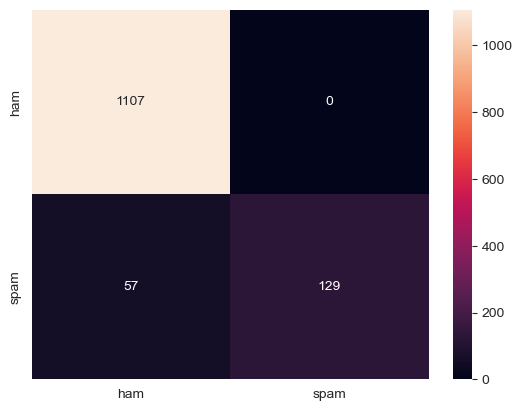

In [156]:
cm = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
plt.show()

In [157]:
from joblib import dump, load
best_model = model_nb
vectorizer = tfidf
dump(best_model, "artifact/best_model.joblib")
dump(vectorizer, "artifact/vectorizer.joblib")


['artifact/vectorizer.joblib']

In [158]:
df.head()

,target,text,total_char,num_words,num_sentences,transformed_text,num_transformed_text
0,0,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",111,24,2,go jurong point crazi avail bugi n great world la e buffet cine got amor wat,16
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni,6
2,1,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,155,37,2,free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18,24
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say,9
4,0,"Nah I don't think he goes to usf, he lives around here though",61,15,1,nah think goe usf live around though,7


In [159]:
df_feature = df[['target','text']]
df_feature.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives around here though"


In [160]:
df_feature['target'] = df_feature['target'].map({0:'no spam', 1:'spam'})
df_feature.rename(columns={'target':'classify'}, inplace=True)
df_feature.head()

/var/folders/q3/xgl4pwjd7lbg8skj81tsl0xr0000gn/T/ipykernel_96355/2115576505.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_feature['target'] = df_feature['target'].map({0:'no spam', 1:'spam'})
/var/folders/q3/xgl4pwjd7lbg8skj81tsl0xr0000gn/T/ipykernel_96355/2115576505.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_feature.rename(columns={'target':'classify'}, inplace=True)


,classify,text
0,no spam,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,no spam,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,no spam,U dun say so early hor... U c already then say...
4,no spam,"Nah I don't think he goes to usf, he lives around here though"


In [161]:
dump(df_feature, "artifact/dataframe.joblib")

['artifact/dataframe.joblib']